In [ ]:
!pip install xgboost

In [1]:
# Importando os módulos

import numpy as np
import pandas as pd      
import matplotlib.pyplot as plt   
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import Functions as fn
%matplotlib inline  

In [2]:
dstrain = pd.read_csv('train.csv', names=['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], sep=',', header=0, dtype={'Age': np.float64})
dstest  = pd.read_csv('test.csv',  names=['PassengerId',             'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], sep=',', header=0, dtype={'Age': np.float64})
dsfull = [dstrain, dstest]

print (dstrain.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [3]:
# Copy Dataframes

dstraincopy = dstrain.copy()
dstestcopy  = dstest.copy()

In [4]:
# Verificando se existem valores nulos e constituição das variáveis.

#Pclass
print('#Pclass')
print (dstrain[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())
print('\n')

#Sex
print('#Sex')
print (dstrain[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean())
print('\n')

#SibSp and Parch
print('#SibSp and #Parch')
for dataset in dsfull:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    
print('Size')
print (dstrain[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

for dataset in dsfull:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
print('Alone')
print (dstrain[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())
print('\n')

#Embarked
print('#Embarked')
for dataset in dsfull:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    
print (dstrain[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean())
print('\n')

#Fare
print('#Fare')
for dataset in dsfull:
    dataset['Fare'] = dataset['Fare'].fillna(dstrain['Fare'].median())
    
dstrain['CategoricalFare'] = pd.qcut(dstrain['Fare'], 4)
print (dstrain[['CategoricalFare', 'Survived']].groupby(['CategoricalFare'], as_index=False).mean())
print('\n')

#Age
print('#Age')
for dataset in dsfull:
    age_avg 	   = dataset['Age'].mean()
    age_std 	   = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
    
dstrain['CategoricalAge'] = pd.cut(dstrain['Age'], 5)
print (dstrain[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=False).mean())
print('\n')

#Name
print('#Name')
for dataset in dsfull:
    dataset['Title'] = dataset['Name'].apply(fn.getTitle)

print(pd.crosstab(dstrain['Title'], dstrain['Sex']))

for dataset in dsfull:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

print (dstrain[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())
print('\n')

#Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


#Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908


#SibSp and #Parch
Size
   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000
Alone
   IsAlone  Survived
0        0  0.505650
1        1  0.303538


#Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


#Fare
   CategoricalFare  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


#Age
  CategoricalAge  Survived
0  (-0.08, 16.0]  0.526786
1   (16.0, 32.0]  0.361174
2   (32.0, 48.0]  0.359375
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


#Name
Sex       female  male
Title                 
Capt           0     1
Col            0

D:\Programs\anaconda3\lib\site-packages\ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [5]:
# Normalizar

for dataset in dsfull:
    # Mapping Sex
    fn.setSex(dataset, 'Sex')
    
    # Mapping titles
    fn.setTitle(dataset, 'Title')
    
    # Mapping Embarked
    fn.setEmbarked(dataset, 'Embarked')
    
    # Mapping Fare
    fn.setFare(dataset, 'Fare')
    
    # Mapping Age
    fn.setAge(dataset, 'Age')
    
# Feature Selection
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'FamilySize']
dstrain = dstrain.drop(drop_elements, axis = 1)
dstrain = dstrain.drop(['CategoricalAge', 'CategoricalFare'], axis = 1)
dstest  = dstest.drop(drop_elements, axis = 1)

print (dstrain.head(10))

dsresult = dstrain.copy()
dstrain = dstrain.values
dstest  = dstest.values

   Survived  Pclass  Sex  Age  Fare  Embarked  IsAlone  Title
0         0       3    1  4.0   0.0         0        0      1
1         1       1    0  5.0   0.0         1        0      3
2         1       3    0  4.0   1.0         0        1      2
3         1       1    0  4.0   0.0         0        0      3
4         0       3    1  4.0   1.0         0        1      1
5         0       3    1  3.0   1.0         2        1      1
6         0       1    1  5.0   0.0         0        1      1
7         0       3    1  1.0   2.0         0        0      4
8         1       3    0  4.0   1.0         0        0      3
9         1       2    0  3.0   2.0         1        0      3


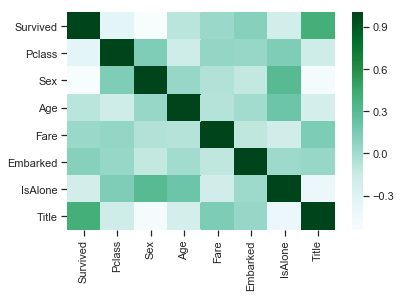

In [6]:
# Visualizando a correlação em tabela

# Coeficiente de correlação: 
# +1  = forte correlação positiva
# 0   = não há correlação
# -1  = forte correlação negativa
fn.corr(dsresult)

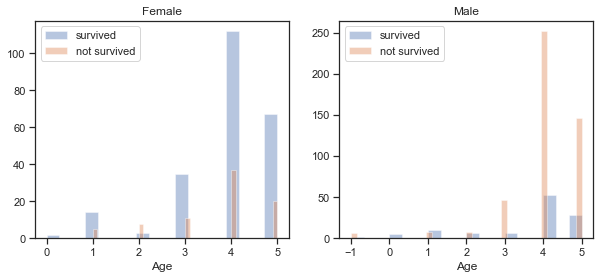

In [7]:
import matplotlib.pyplot as plt  

survived = 'survived'
not_survived = 'not survived'

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))

women = dsresult[dsresult['Sex']==0]
men = dsresult[dsresult['Sex']==1]

ax = sns.distplot(women[women['Survived']==1].Age, bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age, bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')

ax = sns.distplot(men[men['Survived']==1].Age, bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age, bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
ax = ax.set_title('Male')

In [ ]:
# Verifica a relação entre a variável preditora x as independentes

fn.plot(dsresult, 'Survived', 'Pclass')
#fn.plot(dsresult, 'Survived', 'Sex')
#fn.plot(dsresult, 'Survived', 'Age')
#fn.plot(dsresult, 'Survived', 'Fare')
#fn.plot(dsresult, 'Survived', 'Embarked')
#fn.plot(dsresult, 'Survived', 'IsAlone')
#fn.plot(dsresult, 'Survived', 'Title')

In [8]:
from sklearn.metrics import accuracy_score

X = dstrain[0::, 1::]
y = dstrain[0::, 0]

accuracy_score(X, y, normalize=True)

ValueError: Classification metrics can't handle a mix of multiclass-multioutput and binary targets

In [36]:
# Importação dos classificadores

# Suprime erros
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import KFold, StratifiedShuffleSplit, StratifiedKFold
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [38]:
# Comparação dos classificadores

classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression(),
    XGBClassifier()]

splits = 12
cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=cols)

tx = dstrain[0::, 1::]
ty = dstrain[0::, 0]

#kfold = StratifiedKFold(n_splits=splits, shuffle=True, random_state=42)
kfold = KFold(n_splits=splits, random_state=42, shuffle=True)
#shuffle = StratifiedShuffleSplit(n_splits=splits, test_size=0.6, random_state=0)

#shufflesplit = StratifiedShuffleSplit(n_splits=2, test_size=0.5, random_state=0)
#shufflesplit.get_n_splits(tx, ty)
#print(shufflesplit)       

#print("KFold")
#for train_index, test_index in kfold.split(tx, ty):
#    print("TRAIN:", train_index, "TEST:", test_index)

X = dstrain[0::, 1::]
y = dstrain[0::, 0]

acc_dict = {}

for train_index, test_index in kfold.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    for clf in classifiers:
        name = clf.__class__.__name__
        clf.fit(X_train, y_train)
        train_predictions = clf.predict(X_test)
        acc = accuracy_score(y_test, train_predictions)
        if name in acc_dict:
            acc_dict[name] += acc
        else:
            acc_dict[name] = acc

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / 10.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=cols)
    log = log.append(log_entry)

In [44]:
# Comparação dos classificadores

classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression(),
    XGBClassifier()]

splits = 12
cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=cols)
acc_dict = {}

tx = dstrain[0::, 1::]
ty = dstrain[0::, 0]

kfold = KFold(n_splits=splits, random_state=42, shuffle=True)

for train_index, test_index in kfold.split(tx, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    for clf in classifiers:
        name = clf.__class__.__name__
        clf.fit(X_train, y_train)
        train_predictions = clf.predict(X_test)
        acc = accuracy_score(y_test, train_predictions)
        if name in acc_dict:
            acc_dict[name] += acc
        else:
            acc_dict[name] = acc

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / 10.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=cols)
    log = log.append(log_entry)

,
Classifier,Accuracy
XGBClassifier,0.981856
SVC,0.977856
GradientBoostingClassifier,0.977856
RandomForestClassifier,0.959063
DecisionTreeClassifier,0.956360
LogisticRegression,0.956342
AdaBoostClassifier,0.953550
KNeighborsClassifier,0.949658
LinearDiscriminantAnalysis,0.948252


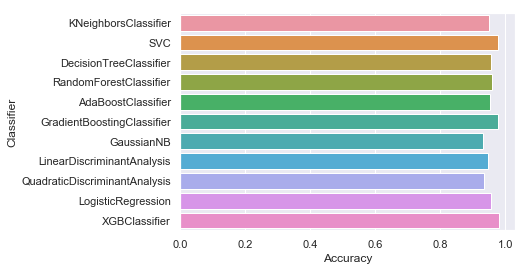

In [45]:
# Plot Classifier Accuracy

sns.set(style="darkgrid")
sns.barplot(x='Accuracy', y='Classifier', data=log)

log.groupby(['Classifier', 'Accuracy']).count().sort_values(by=['Accuracy'], ascending=False)

In [46]:
# Prediction

classifier = GradientBoostingClassifier()
classifier.fit(dstrain[0::, 1::], dstrain[0::, 0])
predictions = classifier.predict(dstest)

In [47]:
# Create csv to upload to Kaggle

#Create a  DataFrame with the passengers ids and our prediction regarding whether they survived or not
dssubmission = pd.DataFrame({'PassengerId': dstestcopy['PassengerId'], 'Survived': predictions})

In [48]:
dssubmission.head()

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,1.0


In [49]:
dssubmission.groupby(['Survived'])['Survived'].count()

Survived
0.0    278
1.0    140
Name: Survived, dtype: int64

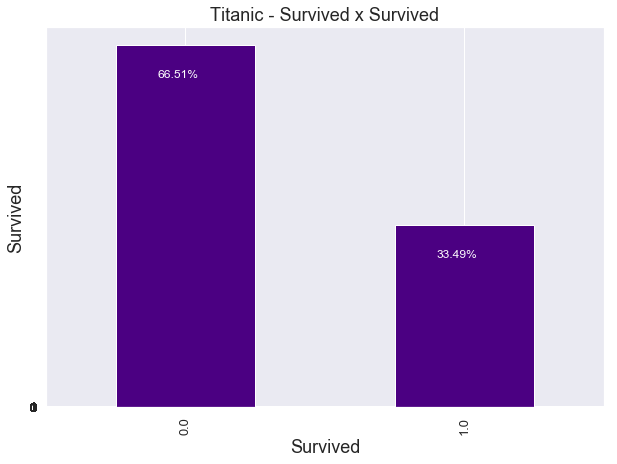

In [50]:
fn.plot(dssubmission, 'Survived', 'Survived')